In [1]:
# We are predicting percentage of subscribers to a service who discontinue their subscriptions to the service within a given time period

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.ticker as mtic
import matplotlib.pyplot as plot

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [2]:
telecomDf = pd.read_csv('../input/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telecomDf.head()
# Lets examine variables for feature selection
telecomDf.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [3]:
# Checking the data types of all the columns
telecomDf.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
# Now lets explore if is there any missing or null values 
telecomDf.TotalCharges = pd.to_numeric(telecomDf.TotalCharges, errors='coerce')
telecomDf.isna().any() # All False confirm there is no missing values


customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [5]:
# Preprocessing
telecomDf.isnull().sum()
# There are 11 missing value for Total Charges, lets remove these 11 values having missing data from dataset
# Remove NA values 
telecomDf.dropna(inplace = True)
# Lets remove customerId from dataset, which is not required for model
telecomDf4dummy = telecomDf.iloc[:,1:]
# Converting Label variable i'e Churn to binary Numerical  
telecomDf4dummy['Churn'].replace(to_replace='No',value=0,inplace=True)
telecomDf4dummy['Churn'].replace(to_replace='Yes',value=1,inplace=True)

# Convert categorical variable into dummy/indicator variables
# pd.get_dummies creates a new dataframe which consists of zeros and ones.
dummiesDf = pd.get_dummies(telecomDf4dummy)
dummiesDf.head(20)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5,0,8,99.65,820.50,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
6,0,22,89.10,1949.40,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0
7,0,10,29.75,301.90,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
8,0,28,104.80,3046.05,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
9,0,62,56.15,3487.95,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0


"\nNow, we have below predictor/independent variables\nContact Month-To-Month\nTenure\nTotal Charges\nOnline Security\nTech Support_No\nInternet_service_FiberOptics\n\nplt.figure(figsize=(20,10))\ndf_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')\nplt.figure(figsize=(15,10))\ndf_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')\n"

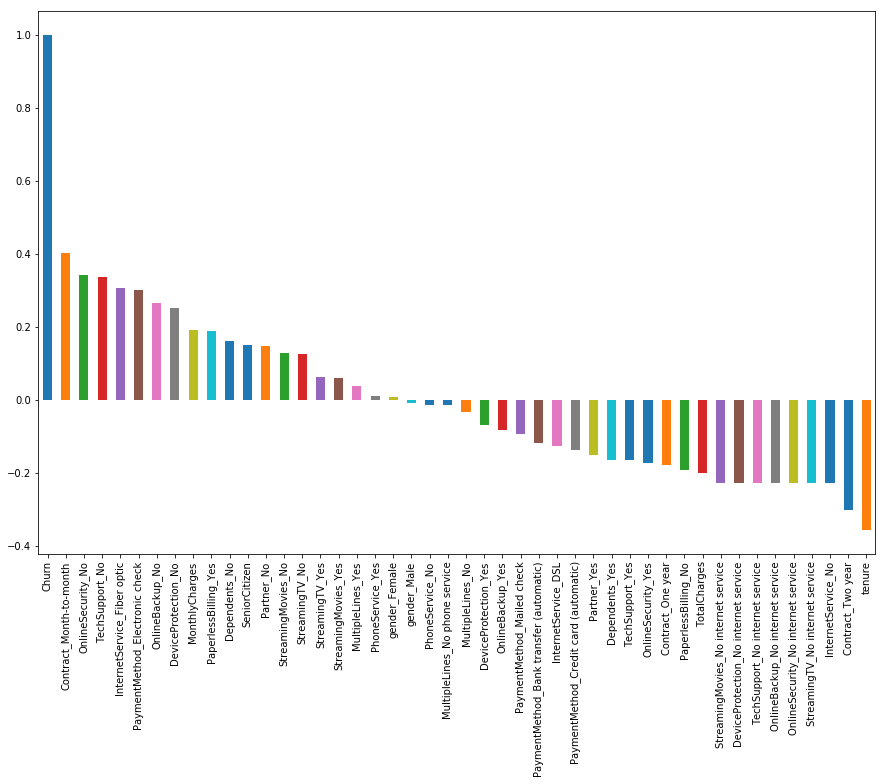

In [6]:
# Feature Selection 

# Now Lets check correlation of Churn with other variables
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
dummiesDf.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
'''
Now, we have below predictor/independent variables
Contact Month-To-Month
Tenure
Total Charges
Online Security
Tech Support_No
Internet_service_FiberOptics

plt.figure(figsize=(20,10))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.figure(figsize=(15,10))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
'''



In [7]:
#  Conclusion:  As per correlation, Month to month contracts, absence of online security and tech support seem to be positively correlated with churn.
#  While, tenure, two year contracts and Internet Service seem to be negatively correlated with churn.
# services such as Online security, streaming TV, online backup, tech support, Device protection, Partner and Streaming movies without internet connection seem to be negatively related to churn.

Y = dummiesDf['Churn'].values
#Accuracy 79.95
X = dummiesDf.drop(columns = ['Churn'])
# Accuracy 78.31%
#selected_features = ['Contract_Month-to-month','tenure','TotalCharges']
#Accuracy 79.31%
selected_features =['Contract_Month-to-month','tenure','TotalCharges','OnlineSecurity_No','TechSupport_No','InternetService_Fiber optic','PaymentMethod_Electronic check','MonthlyCharges','Contract_Two year','InternetService_DSL']
#Accuracy 76.46%
#selected_features=['Contract_Month-to-month','OnlineSecurity_No','TechSupport_No','tenure','Contract_Two year']
#Accuracy 79.53%
#selected_features=X.drop(columns=['PhoneService_Yes','gender_Female','gender_Male','PhoneService_No']).columns.values
X_select = X[selected_features]
# Lets scale all the variables from a range of 0 to 1
# Transforms features by scaling each feature to a given range.
#This estimator scales and translates each feature individually such that it is in the given range on the training set (0,1).
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

# Selected features
scaler.fit(X_select)
X_select = pd.DataFrame(scaler.transform(X_select))
X_select.columns=selected_features

X_select.head(20)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Contract_Month-to-month,tenure,TotalCharges,OnlineSecurity_No,TechSupport_No,InternetService_Fiber optic,PaymentMethod_Electronic check,MonthlyCharges,Contract_Two year,InternetService_DSL
0,1.0,0.000000,0.001275,1.0,1.0,0.0,1.0,0.115423,0.0,1.0
1,0.0,0.464789,0.215867,0.0,1.0,0.0,0.0,0.385075,0.0,1.0
2,1.0,0.014085,0.010310,0.0,1.0,0.0,0.0,0.354229,0.0,1.0
3,0.0,0.619718,0.210241,0.0,0.0,0.0,0.0,0.239303,0.0,1.0
4,1.0,0.014085,0.015330,1.0,1.0,1.0,1.0,0.521891,0.0,0.0
5,1.0,0.098592,0.092511,1.0,1.0,1.0,1.0,0.809950,0.0,0.0
6,1.0,0.295775,0.222779,1.0,1.0,1.0,0.0,0.704975,0.0,0.0
7,1.0,0.126761,0.032668,0.0,1.0,0.0,0.0,0.114428,0.0,1.0
8,1.0,0.380282,0.349325,1.0,0.0,1.0,1.0,0.861194,0.0,0.0
9,0.0,0.859155,0.400317,0.0,1.0,0.0,0.0,0.377114,0.0,1.0


In [8]:
'''
1. Let's use Random forest classifier to approach Telecom churn data
Why Random forest ?
Random forest classifier is trademark term for an ensemble of decision tree
ensemble models combines several decision trees to produce better predictive performance than utilizing a single decision tree.
train_test_split: Split arrays/matrices into random train and test subsets, we are taking 20% data  as test. Random_states is seed value used by the random number generator
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=99)
randomForestModel = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,random_state =50, max_features = "auto",max_leaf_nodes = 30)
randomForestModel.fit(x_train,y_train)
testPrediction =  randomForestModel.predict(x_test)
print(metrics.accuracy_score(y_test,testPrediction))

0.8187633262260128


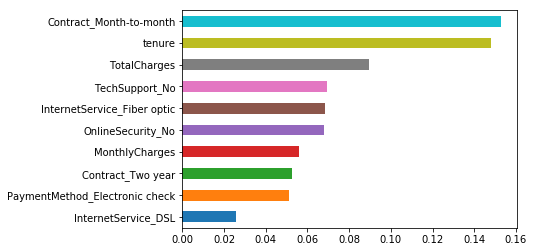

In [9]:
importances = randomForestModel.feature_importances_
weights = pd.Series(importances,index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [10]:
'''
2.1 Let's use Random forest classifier to approach Telecom churn data on selected features
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(X_select, Y, test_size=0.2, random_state=99)
randomForestModel = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,random_state =50, max_features = "auto",max_leaf_nodes = 30)
randomForestModel.fit(x_train,y_train)
testPrediction =  randomForestModel.predict(x_test)
print(metrics.accuracy_score(y_test,testPrediction))

0.8216062544420754


In [11]:
# Confusion Matrix Validation 
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,testPrediction))  

[[963  79]
 [172 193]]


In [12]:
# 3. Lets check performance with SVM ( Support Vecor Machine) Model
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=99)
from sklearn.svm import SVC

modelSVM = SVC(kernel='linear') 
modelSVM.fit(X_train,y_train)
preds = modelSVM.predict(X_test)
metrics.accuracy_score(y_test, preds)



0.820184790334044

In [13]:
# Create the Confusion matrix for SVM
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))  

[[953  89]
 [164 201]]
